# 特徴量の選択と作成

## 特徴量の選択

* 特徴量が多すぎると過学習のリスクになる
* 機械学習の精度を高めるためには重要な特徴量だけを選択する必要がある

## 特徴量選択手法

### 単変量解析

* 目的変数と各説明変数を1対1で確認し取捨選択する
* 分散分析など

### モデルベース選択
* モデルにとっての各変数の重要度を算出し取捨選択する
* ツリー系機械学習手法の重要度をみる

### 反復選択
* 特徴量を増減させながらモデルを生成し良い特徴量を探索する
* ステップワイズ法など

## 対象データ

ここではSIGNATEの[【練習問題】お弁当の需要予測データ](https://signate.jp/competitions/24/data)を使用している

### train.csv（学習データ）

説明変数は新規に作成する

* 説明変数：year, month
* 目的変数：y

### test.csv（評価データ）

説明変数は新規に作成する

* 説明変数：year, month

## データの準備

ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

CSVデータの読み込み

In [2]:
train = pd.read_csv('data/demand_forcast/train.csv')
test = pd.read_csv('data/demand_forcast/test.csv')
sample = pd.read_csv('data/demand_forcast/sample.csv', header=None)

## データの確認

売上の折れ線グラフを確認

<Axes: >

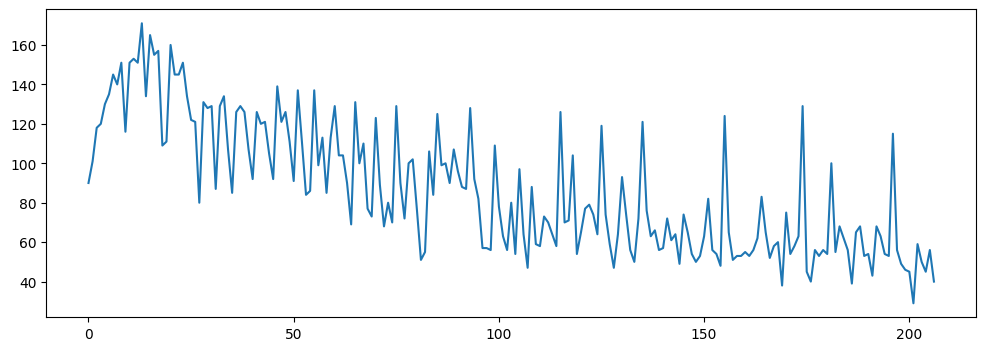

In [3]:
train['y'].plot(figsize=(12, 4))

学習データの内容を確認

In [4]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


## 新しい特徴量の追加

ここでは時系列に相当する新しい特徴量を作成してみる

## 新しいカラムの追加

学習データのdatetimeから年月を取り出し、新たなカラムとして追加する

ハイフンで分割したdatetimeの1つ目の要素を変数yearに格納

In [5]:
train['year'] = train['datetime'].apply(lambda x :x.split('-')[0])

2つ目の要素を変数monthに格納

In [6]:
train['month'] = train['datetime'].apply(lambda x :x.split('-')[1])

評価データにも同様の処理をする

In [7]:
test['year'] = test['datetime'].apply(lambda x :x.split('-')[0])
test['month'] = test['datetime'].apply(lambda x :x.split('-')[1])

## データ型の変換

機械学習に適したデータ型になっているか確認する

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
 12  year           207 non-null    object 
 13  month          207 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.8+ KB


追加した列のデータ型をオブジェクト型から数値型に変換する

In [9]:
train['year'] = train['year'].astype(np.int64)
train['month'] = train['month'].astype(np.int64)
test['year'] = test['year'].astype(np.int64)
test['month'] = test['month'].astype(np.int64)

変換後のデータ型を確認

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
 12  year           207 non-null    int64  
 13  month          207 non-null    int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 22.8+ KB


## ここからは通常の重回帰モデル作成と同様に進める

学習データから説明変数と目的変数を抽出する

In [11]:
trainX = train[['year', 'month']]
y = train['y']

評価データから説明変数を抽出する

In [12]:
testX = test[['year', 'month']]

## モデルの準備

### モデルを表す変数を用意する

In [13]:
model = LR()

## モデルの作成

### 重回帰モデルの作成

In [14]:
model.fit(trainX, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


モデルの傾きを確認する

In [15]:
model.coef_

array([-104.0107109 ,   -7.41004428])

モデルの切片を確認する

In [16]:
model.intercept_

np.float64(209594.15656370853)

## モデルを使った予測

### predict関数での予測

In [17]:
model.predict(testX)

array([42.48436184, 42.48436184, 42.48436184, 42.48436184, 42.48436184,
       42.48436184, 42.48436184, 42.48436184, 42.48436184, 42.48436184,
       42.48436184, 42.48436184, 42.48436184, 42.48436184, 42.48436184,
       42.48436184, 42.48436184, 42.48436184, 42.48436184, 42.48436184,
       42.48436184, 42.48436184, 35.07431756, 35.07431756, 35.07431756,
       35.07431756, 35.07431756, 35.07431756, 35.07431756, 35.07431756,
       35.07431756, 35.07431756, 35.07431756, 35.07431756, 35.07431756,
       35.07431756, 35.07431756, 35.07431756, 35.07431756, 35.07431756])

predict関数を使った予測結果を変数に代入する

In [18]:
pred = model.predict(testX)

## モデルの評価

### SIGNATEで評価する形式にデータを加工する

sampleファイルのカラム[1]に、予測結果を代入する

In [19]:
sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [20]:
sample[1] = pred

In [21]:
sample.head()

,0,1
0,2014-10-1,42.484362
1,2014-10-2,42.484362
2,2014-10-3,42.484362
3,2014-10-6,42.484362
4,2014-10-7,42.484362


sampleをCSVファイルに書き出す

In [22]:
sample.to_csv('data/demand_forcast/output_submit3.csv', index=False, header=False)

書き出したファイルを[SIGNATE](https://signate.jp/competitions/24/data)に投稿して評価を確認する

## 特徴量のさらなる追加

予測値と実績値との誤差を新たな特徴量として追加する

学習データで予測モデルを作成する

In [23]:
pred = model.predict(trainX)

この予測値を学習データの新しいカラムとして追加する

In [24]:
train['pred'] = pred

学習データの販売数実績（y）と予測値（pred）の差を新しいカラム（res）として代入する

In [25]:
train['res'] = train['y'] - train['pred']

新しいカラムに着目してデータの中身を確認する

In [26]:
train.sort_values(by='res')

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,pred,res
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,131.674984,-51.674984
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,139.085028,-49.085028
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,2014,3,94.354672,-43.354672
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,94.354672,-39.354672
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,139.085028,-38.085028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,2014,5,79.534583,46.465417
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,72.124539,48.875461
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,64.714495,59.285505
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,49.894406,65.105594


## 追加する特徴量の検討

### 予測値を大きく外している商品の傾向を読み取る

* 予測より販売数の少ない商品に共通する特徴は見受けられない
* 予測より販売数の多い商品には以下の共通点が見られる
  * 金曜日
  * カレー
  * お楽しみメニュー

### 以下の項目を作成し特徴量として追加する

* お楽しみメニューであるかどうかを表す項目

## 関数の作成

以下の関数を作る

* お楽しみメニューであれば1を返す
* そうでなければ0を返す

In [27]:
def fun_or_not(x):
    if x == 'お楽しみメニュー':
        return 1
    else :
        return 0

作成した関数を使って新しいカラム（frun）を追加する

In [28]:
train['fun'] = train['remarks'].apply(lambda x :fun_or_not(x))
test['fun'] = test['remarks'].apply(lambda x :fun_or_not(x))

追加後のデータを確認する

In [29]:
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,pred,res,fun
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,139.085028,-49.085028,0
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,139.085028,-38.085028,0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,139.085028,-21.085028,0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,139.085028,-19.085028,0
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,139.085028,-9.085028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8,2014,9,49.894406,9.105594,0
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4,2014,9,49.894406,0.105594,0
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1,2014,9,49.894406,-4.894406,0
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6,2014,9,49.894406,6.105594,0


In [30]:
test

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,fun
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2,2014,10,0
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9,2014,10,0
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7,2014,10,0
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5,2014,10,0
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1,2014,10,0
5,2014-10-8,水,0,完熟トマトのホットカレー,420.0,NaN,NaN,NaN,晴れ,--,23.3,2014,10,0
6,2014-10-9,木,0,豚キムチ炒め,435.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,22.5,2014,10,0
7,2014-10-10,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,1.0,薄曇,--,26.1,2014,10,1
8,2014-10-14,火,0,若鶏梅肉包揚げ,408.0,NaN,NaN,NaN,快晴,--,26.8,2014,10,0
9,2014-10-15,水,1,ミックスグリル,450.0,料理長のこだわりメニュー,NaN,NaN,雨,1.5,15.6,2014,10,0


## 重回帰モデルの再作成

追加カラムを含む特定のカラムを説明変数に代入する

In [31]:
trainX = train[['year', 'month', 'fun', 'temperature']]
testX = test[['year', 'month', 'fun', 'temperature']]

## モデルの準備

モデルを表す変数を用意する

In [32]:
model2 = LR()

## モデルの作成

### fit関数でモデルを作成する

説明変数、目的変数の順に指定

In [33]:
model2.fit(trainX, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


モデルの傾きを確認する

In [34]:
model2.coef_

array([-76.3765687 ,  -4.20489757,  44.63348171,  -1.25463854])

モデルの切片を確認する

In [35]:
model2.intercept_

np.float64(153945.25411758255)

## モデルを使った予測

### predict関数での予測

In [36]:
pred2 = model2.predict(testX)

## モデルの評価

### SIGNATEで評価する形式にデータを加工する

sampleファイルのカラム[1]に、予測結果を代入する

In [37]:
sample[1] = pred2

In [38]:
sample.head()

,0,1
0,2014-10-1,55.452079
1,2014-10-2,50.809916
2,2014-10-3,44.787651
3,2014-10-6,53.821048
4,2014-10-7,53.068265


sampleをCSVファイルに書き出す

In [39]:
sample.to_csv('data/demand_forcast/output_submit4.csv', index=False, header=False)

特徴量追加前後の予測値をグラフで比較する

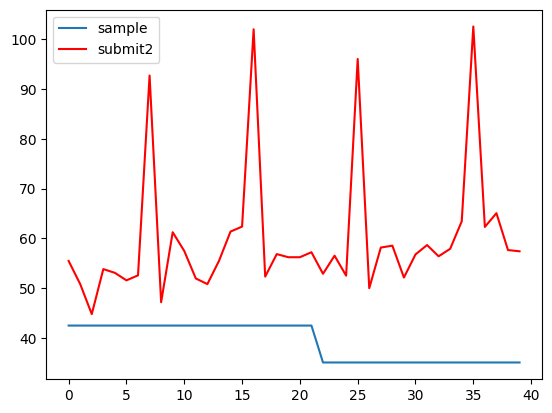

In [40]:
pd.read_csv('data/demand_forcast/output_submit3.csv', header=None)[1].plot(label='sample')
pd.read_csv('data/demand_forcast/output_submit4.csv', header=None)[1].plot(label='submit2', color='red')
plt.legend()

書き出したファイルを[SIGNATE](https://signate.jp/competitions/24/data)に投稿して評価を確認する